# Using Pandas to interrogate a csv


In [21]:
import pandas as pd

df = pd.read_csv('dwguide.csv')

df.head(3)

,episodenbr,title,weekday,broadcastdate,broadcasthour,duration,views,share,AI,chart,cast,crew,summary
0,601,The King's Demons: Part Two,Wed,16 Mar 1983,6:47pm,00:24:27,7.20m,NaN,63.0,66,"[{""role"":""The Doctor"",""name"":""Peter Davison""},...","[{""role"":""Writer"",""name"":""Terence Dudley""},{""r...",The Master and the Doctor fight for control ov...
1,602,The Five Doctors,Fri,25 Nov 1983,7:20pm,01:30:23,7.70m,NaN,75.0,54,"[{""role"":""The Doctor"",""name"":""Peter Davison""},...","[{""role"":""Writer"",""name"":""Terrance Dicks""},{""r...",NaN
2,603,Warriors of the Deep: Part One,Thu,5 Jan 1984,6:41pm,00:24:48,7.60m,NaN,65.0,51,"[{""role"":""The Doctor"",""name"":""Peter Davison""},...","[{""role"":""Writer"",""name"":""Johnny Byrne""},{""rol...",Seabase 4 is on alert as a strange craft appro...


Let's clean the data. First, make sure the episodenbr column contains sensible and unduplicated, consistent data.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   episodenbr     851 non-null    int64  
 1   title          851 non-null    object 
 2   weekday        851 non-null    object 
 3   broadcastdate  851 non-null    object 
 4   broadcasthour  851 non-null    object 
 5   duration       851 non-null    object 
 6   views          851 non-null    object 
 7   share          156 non-null    object 
 8   AI             626 non-null    float64
 9   chart          851 non-null    int64  
 10  cast           851 non-null    object 
 11  crew           851 non-null    object 
 12  summary        757 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 86.6+ KB


In [23]:
# Simple True/False
boolean = df.duplicated(subset=['episodenbr']).any()
print(boolean, end='\n\n') # True eans there's a duplicate

False



The difficulty for me is wokring out how to deal with the nested dictionary for the cast and crew columns. In the end I want to be able to display this in a decent readable way when I look at any particular episode. 

Let's look at the cast col first. We can create a series - a data type just as a dataframe is, just one with only one column. A list, almost. We'll assign the series to the variable *cast*, then check out whats in it.

[{"role":"The Doctor","name":"Peter Davison"},{"role":"Tegan","name":"Janet Fielding"},{"role":"The Master","name":"Anthony Ainley"},{"role":"Ranulf","name":"Frank Windsor"},{"role":"The King","name":"Gerald Flood"},{"role":"Isabella","name":"Isla Blair"},{"role":"Hugh","name":"Christopher Villiers"},{"role":"Sir Geoffrey","name":"Michael J Jackson"},{"role":"Jester","name":"Peter Burroughs"},{"role":"Voice of Kamelion","name":"Gerald Flood (uncredited)"},{"role":"Kamelion","name":"Janet Fielding (uncredited)"},{"role":"Kamelion","name":"Peter Davison (uncredited)"},{"role":"Kamelion","name":"Anthony Ainley (uncredited)"},{"role":"Lute Player","name":"Jakob Lindberg (Radio Times)"},{"role":"Kamelion Operator","name":"Chris Padmore (uncredited)"},{"role":"Stunt Man","name":"John Waller (uncredited)"},{"role":"Stunt Man","name":"Brian Bowes (uncredited)"},{"role":"Gaoler","name":"Tony Annis (uncredited)"},{"role":"Ranulf's Knight","name":"David Cole (uncredited)"},{"role":"(extra)","name":"Tony Annis (uncredited)"},{"role":"(extra)","name":"David Ballard (uncredited)"},{"role":"(extra)","name":"Terence Brook (uncredited)"},{"role":"(extra)","name":"Russell Brook (uncredited)"},{"role":"(extra)","name":"Daryl Brook (uncredited)"},{"role":"(extra)","name":"John Cannon (uncredited)"},{"role":"(extra)","name":"Peter Duke (uncredited)"},{"role":"(extra)","name":"Adrian Fenwick (uncredited)"},{"role":"(extra)","name":"Colin Forsyth (uncredited)"},{"role":"(extra)","name":"Jill Godston (uncredited)"},{"role":"(extra)","name":"Stephen Gressleux (uncredited)"},{"role":"(extra)","name":"Carley Hawkins (uncredited)"},{"role":"(extra)","name":"Jerry Judge (uncredited)"},{"role":"(extra)","name":"Michael Leader (uncredited)"},{"role":"(extra)","name":"Paul Lowther (uncredited)"},{"role":"(extra)","name":"Martin Lyder (uncredited)"},{"role":"(extra)","name":"Mick McKenny (uncredited)"},{"role":"(extra)","name":"Mary Morse-Boycott (uncredited)"},{"role":"(extra)","name":"Mike Mungarvan (uncredited)"},{"role":"(extra)","name":"Kevin O'Brien (uncredited)"},{"role":"(extra)","name":"Eliza Paul (uncredited)"},{"role":"(extra)","name":"Malcolm Ross (uncredited)"},{"role":"(extra)","name":"David J Ross (uncredited)"},{"role":"(extra)","name":"Miles Ross (uncredited)"},{"role":"(extra)","name":"Adam Ross (uncredited)"},{"role":"(extra)","name":"Paul Ryan (uncredited)"},{"role":"(extra)","name":"Graham Stagg (uncredited)"},{"role":"(extra)","name":"Trevor Steedman (uncredited)"},{"role":"(extra)","name":"Gwynne Sullivan (uncredited)"},{"role":"(extra)","name":"Bob Tarff (uncredited)"},{"role":"(extra)","name":"Terry Wallis (uncredited)"},{"role":"(extra)","name":"Lloyd Williams (uncredited)"}]

So the format appears to be square brackets, with data inside it that exists in curly brackets. The data inside the curly brackets comprises a label (such as 'role'), an associated value (such as "Te Doctor"), then a comma and then "name" with an associated value again. Essentially  [{"label1":"Value1","label2":"Value2"}]. 

So the square brackets denote a **list**. The curly brackets denote a **Dictionary** (pairs of indexes and keys). So it's multiple dictionaries inside a single list.

HOWEVER, the data type for the cast colun in the df is "Object". How do we get it to act like a list?

In [24]:
from datetime import datetime
import itertools
import ast
import re
import itertools
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [25]:
imdb_details = pd.read_csv("imdb_details.csv")

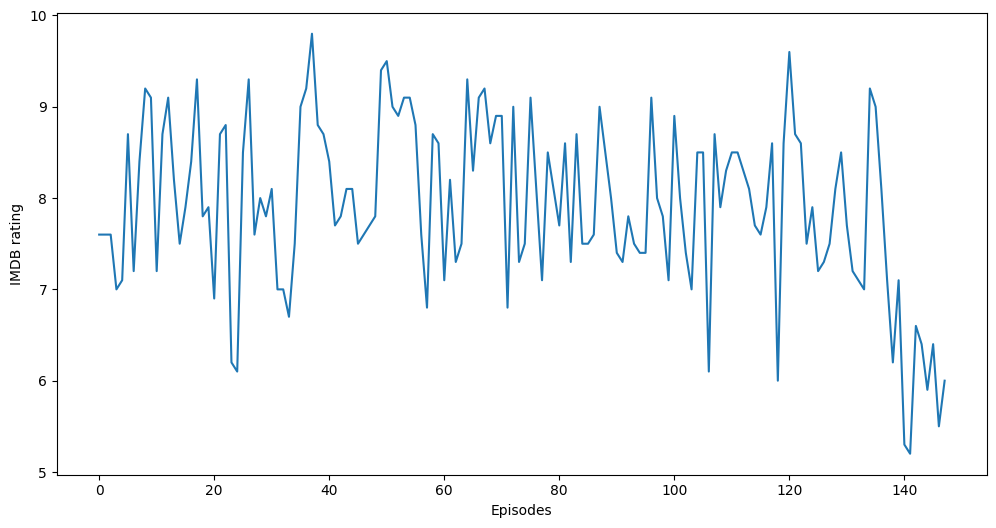

In [26]:
# Let's just draw the rating in function of the episode
fig,ax=plt.subplots(figsize=[12,6])

imdb_details.plot(ax = ax,kind = "line", y="rating", legend=None)

plt.xlabel("Episodes")
plt.ylabel("IMDB rating")

plt.show()

In [27]:
dw_guide = pd.read_csv("dwguide.csv")

In [28]:
# Make some cleaning
dw_guide["AI"] = dw_guide.apply(lambda row: float(row["AI"]),axis=1)
dw_guide["views"] = dw_guide.apply(lambda row: float(row["views"].replace("m","")),axis=1)
dw_guide["date"] = dw_guide.apply(lambda row: row['broadcastdate'] + " " + row['broadcasthour'] ,axis=1)
dw_guide["broadcastdate_datetime"] = dw_guide.apply(lambda row: datetime.strptime(row['date'],"%d %b %Y %I:%M%p") ,axis=1)
dw_guide["broadcastdate_hour"] = dw_guide.apply(lambda row: row['broadcastdate_datetime'].hour,axis=1)
dw_guide["broadcastdate_year"] = dw_guide.apply(lambda row: row['broadcastdate_datetime'].year,axis=1)

#Works on the title of the episode (for the classic area)
dw_guide["title2"] = dw_guide["title"].apply(lambda x:x.split(":")[0])

# Clean the dirty string list
dw_guide["cast"] = dw_guide["cast"].apply(lambda x:ast.literal_eval(x))
dw_guide["crew"] = dw_guide["crew"].apply(lambda x:ast.literal_eval(x))

<unknown>:1: SyntaxWarning: invalid escape sequence '\/'
<unknown>:1: SyntaxWarning: invalid escape sequence '\/'
<unknown>:1: SyntaxWarning: invalid escape sequence '\/'
<unknown>:1: SyntaxWarning: invalid escape sequence '\/'
<unknown>:1: SyntaxWarning: invalid escape sequence '\/'
<unknown>:1: SyntaxWarning: invalid escape sequence '\/'
<unknown>:1: SyntaxWarning: invalid escape sequence '\/'
<unknown>:1: SyntaxWarning: invalid escape sequence '\/'
<unknown>:1: SyntaxWarning: invalid escape sequence '\/'
<unknown>:1: SyntaxWarning: invalid escape sequence '\/'
<unknown>:1: SyntaxWarning: invalid escape sequence '\/'
<unknown>:1: SyntaxWarning: invalid escape sequence '\/'
<unknown>:1: SyntaxWarning: invalid escape sequence '\/'
<unknown>:1: SyntaxWarning: invalid escape sequence '\/'
<unknown>:1: SyntaxWarning: invalid escape sequence '\/'
<unknown>:1: SyntaxWarning: invalid escape sequence '\/'
<unknown>:1: SyntaxWarning: invalid escape sequence '\/'
<unknown>:1: SyntaxWarning: inv

In [29]:
# Estimate if the episode was in the classic era or the modern era
def is_classicperiod(x):
    if x>=2005:
        return False
    return True

dw_guide["is_classicperiod"] = dw_guide["broadcastdate_year"].apply(lambda x:is_classicperiod(x))

In [30]:
# Collect the right columns for the analysis
dw_guide_cast = dw_guide[["episodenbr","title","title2","broadcastdate_datetime","broadcastdate_year","is_classicperiod","cast"]].reset_index()

In [31]:
dw_guide.sort_values(["episodenbr"], ascending = True, inplace = True)
dw_guide.reset_index(inplace = True, drop = True)

In [32]:
# Rebuild the casting of the show
#casting = dw_guide_cast["cast"].explode().to_frame().reset_index() # Run with pandas 0.25

# Use an old trick to do it
casting = pd.DataFrame({'index':dw_guide_cast["index"].repeat(dw_guide_cast["cast"].str.len()),'cast':np.concatenate(dw_guide_cast["cast"].values)})

In [20]:
# Rebuild the casting of the show
casting["name"] = casting["cast"].apply(lambda x:x["name"])
casting["role"] = casting["cast"].apply(lambda x:x["role"])

# Get an uncredited flag
def is_uncredited(x):
    if "uncredited" in x:
        return True
    return False
casting["is_uncredited"] = casting["name"].apply(lambda x:is_uncredited(x))
# Drop the uncredited tag in the name
casting["name"] = casting["name"].apply(lambda x:x.replace(" (uncredited)",""))


del casting["cast"]
del dw_guide_cast["cast"]

In [34]:
# Upgrade the general informations on the casting
dw_guide_cast = dw_guide_cast.reset_index().merge(casting,on = ["index"])
del dw_guide_cast["index"]